# Funktionen: Grundlagen

Funktionen sind Prozeduren (→ prozedurales Programmieren) oder, wenn man so will, Unterprogramme, die aus dem Hauptprogramm heraus aufgerufen werden. Die Vorteile der Verwendung von Funktionen sind:

* Funktionen gliedern den Code und machen ihn so besser verständlich.
* Funktionen sind wiederverwendbar: Eine einmal geschriebene Funktion kann in einem Programm mehrfach an unterschiedlichen Stellen aufgerufen werden. Grundsätzlich kann man eine einmal geschrieben Funktion auch in anderen Programmen "recyclen".
* Funktionen verhindern Redundanz: Jede Funktionalität steht nur einmal im Programm. Das Programm wird dadurch leichter wartbar und die Fehleranfälligkeit wird reduziert.


## Eine Funktion schreiben

Eine Funktionsdefinition beginnt in Python mit dem Schlüsselwort `def` (Viele andere Sprachen verwenden statt dessen `function`). Nach dem `def` folgt der Name der Funktion. Dieser sollte idealerweise ein Verb sein, da eine Funktion immer etwas tut. Der Name der Funktion wird durch ein Paar runde Klammern und einen Doppelpunkt abgeschlossen. Danach folgt eingerückt der eigentliche Funktionskörper, in dem festgelegt ist, was die Funktion tut.

In [ ]:
def say_hello():
    print('Hello!')

Damit haben wir eine Funktion mit dem Namen `say_hello` geschrieben. Die Funktion wurde bei Ausführung zwar erzeugt, sie tut aber noch nichts, da wir sie noch nicht aufgerufen haben. Der Aufruf der Funktion sieht so aus:

In [ ]:
say_hello()

Sie erinnern sich an die Funktionsaufrufe, die wir bisher gemacht haben, ohne eigentlich zu wissen was wir da tun?

* `print()`
* `type()`
* `len()`
* ...

Dabei wird jeweils eine Funktion aufgerufen, die freundlicherweise bereits jemand anders für uns geschrieben hat, und die in jeder Python-Installation zur Verfügung steht

## Funktionsparameter
Die gerade geschriebene Funktion `say_hello()` stellt nur die Minimalversion einer Funktion dar: Sie tut immer dasselbe. Wir können die Funktion flexibler machen, indem wir ihr bei der Definition **Parameter** zuweisen:

In [ ]:
def say_hello(username):
    print(f'Hello {username}!')

Hier legt die Funktionsdeklaration fest, dass der Funktion beim Aufruf ein *Parameter*, also ein Wert übergeben werden muss, der dann innerhalb der Funktion als  Variable `username` verfügbar ist. Wir können diesen Wert als *Argument* beim Aufruf der Funktion übergeben:

In [ ]:
say_hello('Otto')

In [ ]:
say_hello('Anna')

## Rückgabewerte

### Der Default-Rückgabewert ist `None`

Jede Funktion gibt beim Aufruf einen Wert zurück. Dieser zurückgegeben Wert ersetzt quasi den Funktionsaufruf.

In [ ]:
def square(number):
    return number * number

square(2) + square(3)  # 4 + 9

Der Rückgabewert wird mit der ``return``  Anweisung festgelegt und sollte immer am Ende des *Funktionskörpers* stehen. Wird keine ``return``-Wert explizit festgelegt, ist der Rückgabewert immer ``None``, als der Nicht-Wert. Hier ein Beispiel, das diesen nicht explizit angegebenen Rückgabewert verdeutlicht:

In [ ]:
def say_hello(username):
    print(f'Hello {username}!')
    
retval = say_hello('Otto')  # Store return value to variable
print(f'Rückgabewert: {retval}')

### Explizite Rückgabewerte

Explizite Rückgabewerte sind immer dann sinnvoll, wenn eine Funktion z.B. etwas berechnet und das Resultat der Berechnung im Hauptprogramm verwendet werden soll. Das erste Beispiel `say_hello()` hat die Begrüßung direkt in Ausgabe geschrieben. Die Funktion wäre vielseitiger nutzbar, wenn wir die generierte Begrüßung als String zurück bekämen. Dann könnten wie sie z.B. auch in eine Datei speichern oder in einem E-Mail verwenden. Machen wie die Funktion also viellseitiger. Das sollte sich auch einem einem besser passenden Funktionsnamen niederschlagen:

In [ ]:
def generate_greeting(name):
    return f"Hello {name}!"

print(generate_greeting('Otto'))    

#### Ein anderes Beispiel

Die folgende Funktion transformatiert den übergebenen String so, dass nur das erste und letzte Zeichen zurückgegeben werden. Zwischen diesen beiden Zeichen steht der Zahl der ausgelassenen Zeichen. `abcd` wird also zu `a2d`.

In [ ]:
def shorten(long_str):
    if len(long_str) > 2:  # only useful for strings with at least 3 characters
        # return the first, last character and in between the number of left out characters
        rv = f"{long_str[0]}{len(long_str) - 2}{long_str[-1]}"
    else:
        rv = long_str
    return rv

In [ ]:
shorten('internationalization')

In [ ]:
shorten('Donaudampfschifffartskapitän')

<div class="alert alert-block alert-info">
<b>Übung Func-1</b>
<p>Schreiben Sie eine Funktion <tt>count_distinct_chars()</tt>, die einen Parameter <tt>text</tt> erwartet. Ermitteln Sie in der Funktion, aus wie vielen unterschiedlichen Zeichen <tt>text</tt> besteht (falls Sie nicht mehr wissen wie das geht, sehen Sie im Notebook zu sets nach) und liefern Sie diese Zahl als Ergebnis zurück</p>
<p>Wenn Sie also <tt>count_distinc_chars('abcabc')</tt> aufrufen, sollen Sie als Ergebnis <tt>3</tt> bekommen.
</div>    

### Ein echtes Beispiel
Erinnern wir uns an die Hausübung, wo wir die beliebtesten Vornamen von 1984 und 2015 verglichen haben. Dort haben wir für jedes der beiden Jahre die Namen aus der entsprechenden Datei als Liste eingelesen:

In [ ]:
# we use the data from the 01-grundlagen directory:
# so we have to move up 1 directory level (..) and then down to 01-grundlagen
with open('../data/vornamen/vornamen_1984.txt') as fh:
    names_84 = [n.rstrip() for n in fh.readlines()]

Anstatt diesen Code für jede zu untersuchende Datei neu zu schreiben, können wir eine entsprechende Funktion `read_names()` programmieren und diese mehrfach aufrufen:

In [ ]:
def read_names(filename):
    with open(filename) as fh:
        names = [n.rstrip() for n in fh.readlines()]
    return names

In [ ]:
names_84 = read_names('../data/vornamen/vornamen_1984.txt')
names_15 = read_names('../data/vornamen/vornamen_2015.txt')

Wenn wir davon ausgehen können, dass wir die beliebtesten Vornamen eines jeden Jahres immer im Verzeichnis `data/vornamen` finden, und die Dateinamen immer gleich aufgebaut sind (`vornamen_YYYY.txt`), können wir auch eine spezialisiertere Funktion schreiben:

In [ ]:
def read_names_for_year(year):
    filename = f"../data/vornamen/vornamen_{year}.txt"
    with open(filename) as fh:
        names = [n.rstrip() for n in fh.readlines()]
    return names

In [ ]:
names_84 = read_names_for_year(1984)
names_15 = read_names_for_year(2015)

### Funktionen vermeiden Redundanz
Die zweite Lösung ist nicht so allgemein verwendbar wie die erste (weil sie voraussetzt, dass alle Vornamen-Dateien in einem bestimmten Verzeichnis liegen und einem bestimmten Namensschema folgen), bietet aber neben der kompakteren Schreibweise beim Aufruf einen weiteren Vorteil: Falls sich z.B. an der Verzeichnisstruktur etwas ändern sollte, müssen wir diese Änderung nicht bei jedem einzelnen Aufruf der Funktion nachziehen, sondern nur an genau einer Stelle: in der Funktion.

Nehmen wir an, aus irgendwelchen Gründen müssten wir den Verzeichnisnamen von `data/vornamen` nach `data/popular_firstnames` ändern. Während wir im ersten Beispiel alle Aufrufe von `read_names()` suchen und dort den Verzeichnisnamen ändern müßten (was bei zwei Aufrufen jetzt nicht so aufwändig wäre ;-)), brauchen wir im zweiten Fall die Änderung nur einmal (in der Funktion) zu machen:


In [ ]:
def read_names_for_year(year):
    filename = f"../data/popular_firstnames/vornamen_{year}.txt"
    with open(filename) as fh:
        names = [n.rstrip() for n in fh.readlines()]
    return names

Hier aber auch gleich eine Warnung: Die Wiederverwendbarkeit einer Funktion hängt stark von ihrer Flexibilität (sprich: Parametrisierbarkeit) ab. Je spezialisierter eine Funktion ist, desto seltener kann sie wiederverwendet werden. Ebenso gilt das Gegenteil: Man kann eine Funktion sehr flexibel schreiben, indem man viele Parameter verwendet, aber irgendwann wird die Verwendung der Funktion dadurch so kompliziert, dass man sie nicht mehr verwenden will.

## Eine Funktion mit mehreren Parametern

Grundsätzlich kann eine Funktion beliebig viele Parameter haben. In der Praxis sollte man sich, außer man hat sehr gute Gründe, auf maximal 3 oder 4 Parameter beschränken, weil das die Verwendbarkeit (sprich: Verständlichkeit) erleichtert. 

Im folgenen Beispiel berechnen wir das Gewicht von Wasser in einem Quader:

In [ ]:
def compute_weight(length, width, height):
    ccm = length * width * height
    return ccm / 1000

In [ ]:
compute_weight(80, 40, 40)

## Exkurs: Kommentare
Dokumentation des Source Codes ist wichtig, weil dadurch der Code erklärt und für spätere Bearbeiter:innen (und das werden häufig Sie selbst sein) leichter verständlich wird. Dazu verwendet man Kommentare. Das Kommentarzeichen in Python ist `#`. Alles was rechts neben dem Kommentarzeichen steht, wird beim Ausführen des Programms ignoriert.

Man sollte allerdings nur Dinge kommentieren, die sich nicht ohnehin auf einfache Weise aus dem Code ableiten lassen:

~~~
    i += 1 # increase i by 1
~~~

ist ein gutes Beispiel für einen unnötigen Kommentar. Als Faustregel sollten Sie beherzigen: Dokumentieren Sie nicht *was* passiert, sondern *warum* es passiert.

Im nächsten Beispiel dokumentieren wir, woher ein bestimmter Wert kommt. Hier macht der Kommentar mehr Sinn.

~~~
def compute_weight(length, width, height):
    ccm = length * width * height
    # we assume a water density of 1000 kg/cbm
    # so we first convert ccm to cbm 
    # and multiply by density of water (1000 kg/cbm)
    # so ccm / 1000000 * 1000 = ccm / 1000
    return ccm / 1000
~~~    

## Docstrings
Python bietet mit Docstrings eine Besonderheit. In Form solcher Docstrings wird die Dokumentation Teil der Funktion (Docstrings können auch für Module und Pakete verwendet werden, aber dazu kommen wir erst später). Ein Docstring muss unmittelbar nach der Funktionsdeklaration in Form eines Strings stehen: 

In [ ]:
def compute_weight(length, width, height):
    "Return the weight of a fish tank in kg."
    ccm = length * width * height
    # we assume a water density of 1000 kg/cbm
    # so we first convert ccm to cbm and multiply by density
    # so ccm / 1000000 * 1000 = ccm / 1000
    return ccm / 1000

Der Docstring in diesem Beispiel wird wirklich Teil des Funktion-Objekts und kann abgefragt werden:

In [ ]:
compute_weight.__doc__

Das macht sich beispielsweise die in Python eingebaute `help()`-Funktion zunutze, um die Beschreibung einer Funktion anzuzeigen. Aber auch integrierte Entwicklungsumgebungen (IDEs) verwenden Docstrings, um kontextsensitiv Informationen zur Verwendung einer Funktion anzuzeigen.

In [ ]:
help(compute_weight)

### Mehrzeilige Docstrings
Zusätzlich zur Basisform können auch ausführlichere Docstrings geschrieben werden:

In [ ]:
def compute_weight(length, width, height):
    """Compute weight of water (in kg) for a fish tank.
    
    Args:
        length -- length in cm.
        width -- width in cm.
        height -- height in cm.
    Returns:
        Weight in kg as float.
    """
    ccm = length * width * height
    # we assume a water density of 1000 kg/cbm
    # so we first convert ccm to cbm and multiply by density
    # so ccm / 1000000 * 1000 = ccm / 1000
    return ccm / 1000

In [ ]:
help(compute_weight)

<div class="alert alert-block alert-info">
<b>Übung Func-2</b>
<p>Die Dichte des Wassers ist abhängig von der Temperatur. Diese Werte stehen im Dictionary `densities`. Schreiben Sie `compute_weight` so um, dass das Gewicht abhängig von der Temperatur berechnet wird. D.h. schreiben Sie die Funktion so um, dass zusätzlich die Temperatur übergeben wird und berechnen Sie das Gewicht unter Berücksichtigung der Temperatur.</p>
<div>

In [ ]:
# fluid densities only
# ice has a density of 918, steam of 0.59 
densities = {0: 999.84, 1: 999.9, 2: 999.94, 3: 999.96, 4: 999.97, 5: 999.96, 
             6: 999.94, 7: 999.9, 8: 999.85, 9: 999.78, 10: 999.7, 11: 999.6, 
             12: 999.5, 13: 999.38, 14: 999.24, 15: 999.1, 16: 998.94, 
             17: 998.77, 18: 998.59, 19: 998.4, 20: 998.2, 21: 997.99, 
             22: 997.77, 23: 997.54, 24: 997.29, 25: 997.04, 26: 996.78, 
             27: 996.51, 28: 996.23, 29: 995.94, 30: 995.64, 31: 995.34, 
             32: 995.02, 33: 994.7, 34: 994.37, 35: 994.03, 36: 993.68, 
             37: 993.32, 38: 992.96, 39: 992.59, 40: 992.21, 45: 990.21, 
             50: 988.03, 55: 985.69, 60: 983.19, 65: 980.55, 70: 977.76, 
             75: 974.84, 80: 971.79, 85: 968.61, 90: 965.3, 95: 961.88, 
             100: 958.35}


<div class="alert alert-block alert-info">
<b>Übung Func-3</b>
<p>Schreiben Sie die Funktion aus Übung Func-2 so um, dass nicht ein einzelner Temperaturwert übergeben wird, sondern zwei Werte, die als Intervall interpretiert werden sollen (von ... bis). Die Idee dahinter ist, dass man sagen kann: In diesem Raum liegt die Temperatur immer zwischen z.B. 10 und 30 Grad Celsius.</p>
<p>Die Funktion soll das höchste Gewicht für diesen Temperaturbereich liefern.</p>
<div>

## Funktionen mit mehreren Rückgabewerten
In den meisten Programmiersprachen können Funktionen nur einen Wert zurückliefern (außer natürlich, wenn die Rückgabewerte in einen Container "verpackt" werden). In Python können aber direkt zwei oder mehr Werte zurückgeliefert werden. Zwei oder mehr durch Komma getrennte Werte werden von Python als Tuple interpretiert -- der eigentliche Rückgabewert ist also ein Tuple. Da die Syntax von Python aber erlaubt, die einzelnen Werte eines Tuples wieder mehreren Variablen zuzuweisen (``foo, bar = (1, 2)``) kann man Funktionen, die ein Tupel zurückgeben, so verwenden, als würde die Funktion mehrere Werte zurückgeben.

In [ ]:
import random # we need this because we do not have a thermometer attached


def get_temperature():
    "Return temperature in Celsius and Fahrenheit."""
    # as we do not have a thermometer attached, we return a random temperature
    celsius = random.randint(-30, 45)
    fahrenheit = celsius * (9/5) + 32
    return celsius, fahrenheit

celsius, fahrenheit = get_temperature()
print(f'Aktuelle Temperatur: {celsius}° Celsius ({fahrenheit:0.2f}° Fahrenheit)')

Ganz grundsätzlich: Das Beispiel `get_temperature()` ist ein sehr konstruiertes Beispiel,  üblicher wäre es, die Maßeinheit als Parameter zu übergeben oder zwei eigenständige Funktionen für Celsius und Fahrenheit zu haben. 

Sie können ja versuchsweise die Funktion entsprechend umschreiben.

##  Default Parameter
Normalerweise muss die Reihenfolge der Argumente beim Aufruf der Funktion der Reihenfolge der Parameter in der Funktionsdeklaration entsprechen und es müssen auch alle Argumente mitgegeben werden:

~~~
def set_userdata(username, age):
    ...
    
set_userdata('otto', 20)    
~~~

Werden beim Funktionsaufruf nicht alle Parameter belegt, führt das zu einem Fehler:

In [ ]:
def set_userdata(username, age):
    return username, age

set_userdata('Hans')

Falls wir einen Parameter nicht zwingend erwarten, können wir für diesen einen Defaultwert festlegen:

In [ ]:
def set_userdata(username, age=None):
    return username, age

print(set_userdata('otto', 20))
print(set_userdata('anna'))

Wenn der Wert mitgegeben wird, wird er in der Funktion verwendet, andernfalls wird der Defaultwert verwendet. Solche vorbelegten Parameter müssen **nach** allen anderen Parametern stehen, weshalb der folgende Code-Block nicht funktioniert.

In [ ]:
def set_userdata(age=None, username):
    return username, age

Wenn mehr als ein Default Parameter definiert wird, können beim Aufruf der Funktion Keyword Arguments verwendet werden, wodurch wir uns nicht mehr an die gegebene Reihenfolge halten müssen:

In [ ]:
def set_userdata(username, age=None, weight=None, height=None):
    return username, age, weight, height

print(set_userdata('Otto', height=181))

In [ ]:
print(set_userdata('Otto', height=181, age=25))

## Funktionen mit beliebig vielen Parametern
Manchmal ist zum Zeitpunkt, an dem die Funktion geschrieben wird, noch nicht bekannt, wie viele Parameter zu erwarten sind. In diesem Fall können wir die Funktionsdeklaration so schreiben:

~~~
def my_function(*args):
~~~

In diesem Fall werden alle Werte in ein Tupel gepackt:


In [ ]:
def my_function(*args):
    print(type(args))
    
my_function(1, 2, 3)    

Damit können wir z.B. eine Funktion zur Ermittlung des arithmetische Mittels schreiben: 

In [ ]:
def avg(*args):
    return sum(args) / len(args)

avg(1, 2, 3, 4)

In der Praxis werden Sie das aber eher selten benötigen. Üblicher wäre eine Implementierung, die z.B. den Mittelwert für ein Iterable ermittelt: 

In [ ]:
def avg(values):
    return sum(values) / len(values)

# with list
avg([1, 2, 3, 4])

In [ ]:
# with set
avg({1, 3, 8, 4, 2})

In [ ]:
# with range
avg(range(1, 101))

## Exkurs: Type hints

Python ist eine dynamisch typisierte Sprache. Das bedeutet, dass der Datentyp einer Variable sich während des Programmablaufs ändern kann:

In [ ]:
age = 21
print(age)
age = "jung"
print(age)

Diese dynamische Typisierung hat viele Vorteile, kann aber auch nachteilig sein. Sehen wir uns zum Beispiel die folgende, bewusst möglichst einfach gehaltene Funktion an:

In [ ]:
def join(val1, val2):
    "Join two strings."
    return val1 + val2

print(join('foo', 'bar'))
print(join(1,2))

Je nach Anwendungsfall kann das erwünscht sein oder auch nicht. Es kann sogar sein, dass das die Verwendung nicht vorgesehener Datentypen zu unerwarteten oder gar falschen Ergebnissen führt. 

Wenn die Funktion eigentlich nur für Strings gedacht ist, können wir das nur zur Laufzeit in der Funktion prüfen (und nicht wie in anderen Sprachen schon beim Kompilieren):

In [ ]:
def join(val1, val2):
    "Join two strings."
    if not isinstance(val1, str):
        raise ValueError("val1 must be a string")
    if not isinstance(val2, str):
        raise ValueError("val2 must be a string")
    return val1 + val2

join("foo", "bar")
join(1, 2)

Python bietet aber noch eine weitere Möglichkeit, den erwarteten Typ antzugeben: Type Hints

In [ ]:
def join(val1: str, val2: str) -> str:
    return val1 + val2

Damit wird dokumentiert, dass wir erwarten, dass beide Parameter Strings sein sollen (``val1: str``, ``val2: str``). Wir haben zusätzlich angegeben, dass der Rückgabewert ein String ist (``-> str``).
Diese Type Hints werden aber von Python selbst nicht überprüft, sie sind, wie der Name schon sagt, nur Hinweise. Die Funktion schluckt also nach wie vor z.B. auch Integer:


In [ ]:
join(1, 2)

Wozu sollte man also Type Hints verwenden, wenn Sie anscheinend keine Auswirkungen haben?

  * Sie erleichtern die Nachvollziehbarkeit des Codes
  * Es gibt Werkzeuge, die Tpe Hints auswerten und warnen, wenn unerwartete Datentypen verwendet werden. Z.B. Mypy (https://www.mypy-lang.org/),
    Pyright (https://github.com/Microsoft/pyright), pyre (https://pyre-check.org/) oder Pytype (https://google.github.io/pytype/).
  * Manche  IDEs wie z.B. PyCharm markieren Code, der gegen Type Hints verstößt
    
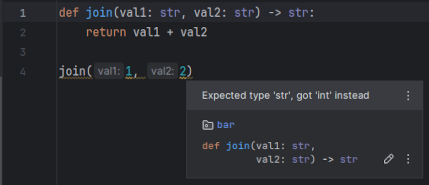

## Vertiefende Literatur
Ich empfehle ausdrücklich, mindestens eine der folgenden Ressourcen zur Vertiefung zu lesen!

  * Python Tutorial: 
	* Kapitel 4.6 - Defining Functions 
      (https://docs.python.org/3/tutorial/controlflow.html#defining-functions)
    * Kapitel 4.7 - More on Defining Functions
	  (https://docs.python.org/3/tutorial/controlflow.html#more-on-defining-functions)
  * Klein, Kurs: 
	* Funktionen (https://python-kurs.eu/python3_funktionen.php)
	* Parameter-Übergabe (http://python-kurs.eu/python3_parameter.php)
	* Globale und lokale Variablen (http://python-kurs.eu/python3_global_lokal.php)
	* Rekursive Funktionen (http://python-kurs.eu/python3_rekursive_funktionen.php)
	* Flaches und tiefes Kopieren (http://python-kurs.eu/python3_deep_copy.php)
  * Sweigart: https://automatetheboringstuff.com/2e/chapter3/  
  * https://docs.python.org/3/library/typing.html  
    
  * Klein, Buch: Kapitel 14, 15 und evtl. 13.
  * Kofler: Kapitel 9.
  * Inden: Kapitel 2.5.
  * Weigend: Kapitel 6.1 bis 6.8 und 6.14.
  * Pilgrim: Kapitel 1.2
    (https://www.diveinto.org/python3/your-first-python-program.html#declaringfunctions)
  * Downey: Kapitel 3
    (http://www.greenteapress.com/thinkpython/html/thinkpython004.html)
    
    
  * Video: Ned Batchelder - Facts and Myths about Python names and values - PyCon 
    2015 (https://www.youtube.com/watch?v=_AEJHKGk9ns)
    